# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

### Short explanation of Pros and cons of the two representations:

- #### Histogram Pros:

    This graph is showing us how the data is distributed and it is also showing that the data is skewed towards the lower values. This also shows there could be outliers(heavy tails) in the graph
    This graph is showing us frequency distribution clearly 
    The bins show how many drugs are priced in each of the bins
    It also shows the major number of drugs are priced within 15 dollars
    It also shows there could be outliers in the price ranges 40 and above
  
- #### Histogram Cons:

    The graph does not convey the story as it lacks title and labels

    The legend just says Data but it does not say what it is

    It does not show the Mean or the median of the data

    It does not show the prices at which we can call it outliers

    The graph does not show the prices where most of the drug starts at as the first Bin covers the whole range 

- #### Boxplot Pros:

    This graph is showing us what median is about 7.5- 8 dollar range
    
    The graph is showing us the various quartiles clearly 
    
    The majority of the drugs are priced between approximately 4 dollar to 15 dollar(by visual inspection)
   
    There are no outliers in the lower side( there arte no outlier bubble below the lower whisker)
   
    There are outliers approximately above dollar 35-36 range and there are multiple outliers which are priced pretty high and the max price looks to be around 56 dollar. It also shows other outlier drug prices clearly

- #### Boxplot Cons:

    The graph does not convey the story as it lacks title and labels, doesnt say what each of the lines are indicating
    
    The legend just says Data but it does not say what it is
    
    The distribution is properly showing in the histogram but not on this chart 
    
    To a business user this chart is more difficult to understand compared to the histogram in its current form (proper labeling missing)
    
#### Conclusion:  

Both the chart complement each other but still lacks other details needed. In its current form since I am analyzing and I understand both the given grpah I will go with the box plot.

### Modifications to the formatting to make it more visually interesting, clear, or informative:

Histogram :
- Add a title to the graph (Distribution of Drug Prices)
- Add x label(price in dollars) and y axis labels (drug frequency)
- Add a legend to the graph (drug prices)
- I will add a kde plot to the histogram to show the distribution of the drug prices better
- Add the Mean , median and Outlier marker lines(vertical lines) to the graph to show the price ranges of the drugs
- Add the quartile values to the graph to the quartile ranges

Boxplot:
- Add a title to the graph (Distribution of Drug Prices)
- Add x label(price in dollars) and y axis labels (drug frequency)
- 



  

In [89]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

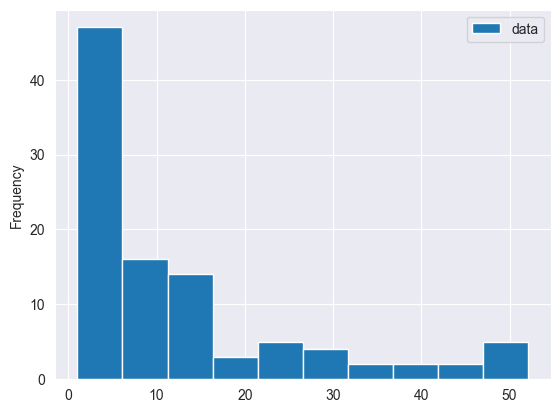

In [90]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

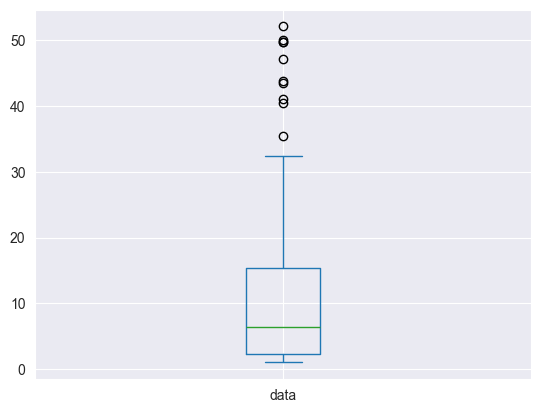

In [91]:
df.plot.box()

### Here is how I will represent the data in a better way for users to interpret easily

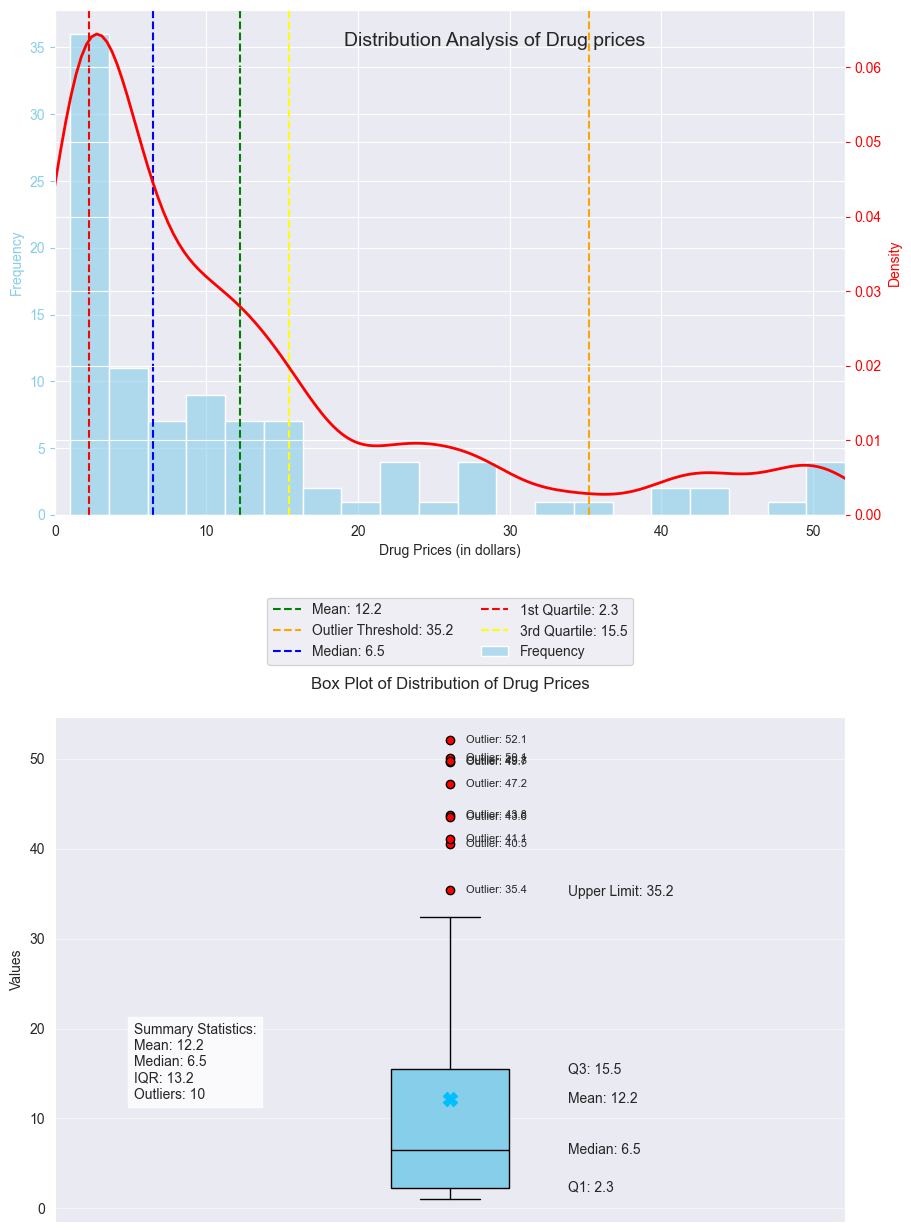

In [92]:

import seaborn as sns


# random data generation
np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size=num_data) * 4)
df = pd.DataFrame(data.T, columns=["data"])

#  key statistics calculate 
stats = df['data'].describe()
q1, q2, q3 = stats['25%'], stats['50%'], stats['75%']
iqr = q3 - q1
outlier_threshold = q3 + 1.5 * iqr

# create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14))
fig.suptitle('Distribution Analysis of Drug prices', fontsize=14, y=0.95)

# twin axis for histogram to show frequency on lef t and density on right side else the density value being so low not able to shwo the values
#  https://stackoverflow.com/questions/37461434/seaborn-despine-with-two-y-scales-twinx
ax1_twin = ax1.twinx()

# histogram with frequency on primary y-axis
sns.histplot(data=df, x='data', bins=20, ax=ax1, color='skyblue', 
            alpha=0.6, stat='count', label='Frequency')

#  KDE on secondary y-axis
sns.kdeplot(data=df, x='data', ax=ax1_twin, color='red', linewidth=2, 
            label='Density', bw_adjust=0.5)

# Add vwertical lines for key statistics
stats_line = ax1.axvline(stats['mean'], color='green', linestyle='--', 
                        label=f'Mean: {stats["mean"]:.1f}')
outlier_line = ax1.axvline(outlier_threshold, color='orange', linestyle='--', 
                          label=f'Outlier Threshold: {outlier_threshold:.1f}')
median_line = ax1.axvline(q2, color='blue', linestyle='--', 
                         label=f'Median: {q2:.1f}')
q1_line = ax1.axvline(q1, color='red', linestyle='--', 
                      label=f'1st Quartile: {q1:.1f}')
q3_line = ax1.axvline(q3, color='yellow', linestyle='--', 
                      label=f'3rd Quartile: {q3:.1f}')

# Add axes labels first subplot
ax1.set_xlabel('Drug Prices (in dollars)')
ax1.set_ylabel('Frequency', color='skyblue')
ax1_twin.set_ylabel('Density', color='red')
ax1.tick_params(axis='y', colors='skyblue')
ax1_twin.tick_params(axis='y', colors='red')
ax1.set_xlim(0, df['data'].quantile(1))    # adding this to limit the kde graph else its stretching the graph without data both on left and right

# position label at the bottom of the graph
ax1.legend( bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=2)

# create box plot in second subplot
bp = ax2.boxplot(df['data'], patch_artist=True,
                boxprops=dict(facecolor='skyblue', color='black'),
                medianprops=dict(color="black"),
                flierprops=dict(marker='o', markerfacecolor='red', markersize=6))

# add the labels for key stats
ax2.text(1.15, q3, f'Q3: {q3:.1f}', verticalalignment='center')
ax2.text(1.15, q2, f'Median: {q2:.1f}', verticalalignment='center')
ax2.text(1.15, q1, f'Q1: {q1:.1f}', verticalalignment='center')

# set the plot mean as a blue X
ax2.plot(1, stats['mean'], 'X', color = '#00BFFF', markersize=10, label='Mean')
ax2.text(1.15, stats['mean'], f'Mean: {stats["mean"]:.1f}', verticalalignment='center')

# add labels for the upper whisker  
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr
ax2.text(1.15, upper_whisker, f'Upper Limit: {upper_whisker:.1f}', verticalalignment='center')

# Label outliers
outliers = [x for x in df['data'] if x > upper_whisker ]
for outlier in outliers:
    ax2.text(1.02, outlier, f'Outlier: {outlier:.1f}', 
             verticalalignment='center', fontsize=8)

# Customize box plot
ax2.set_title('Box Plot of Distribution of Drug Prices', pad=20)
ax2.set_ylabel('Values')
ax2.grid(True, alpha=0.5)
ax2.set_xticks([])

#  print summary statistics in box plot 
stats_text = (f'Summary Statistics:\n'
             f'Mean: {stats["mean"]:.1f}\n'
             f'Median: {q2:.1f}\n'
             f'IQR: {iqr:.1f}\n'
             f'Outliers: {len(outliers)}')

ax2.text(0.6, stats['mean'], stats_text, fontsize=10,
         bbox=dict(facecolor='white', alpha=0.8))


plt.tight_layout()
plt.subplots_adjust(right=0.85, bottom=0.1, hspace=0.4)
plt.show()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

##  Importing the week2 notebook (this is last semester identified datset called Walmart sales forecasting)   

OMDS-ModB2-Week2-Halder-Deb  which I had done the EDA for the Walmart so I can use that data set  and reuse my previously created dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
It worked!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------      

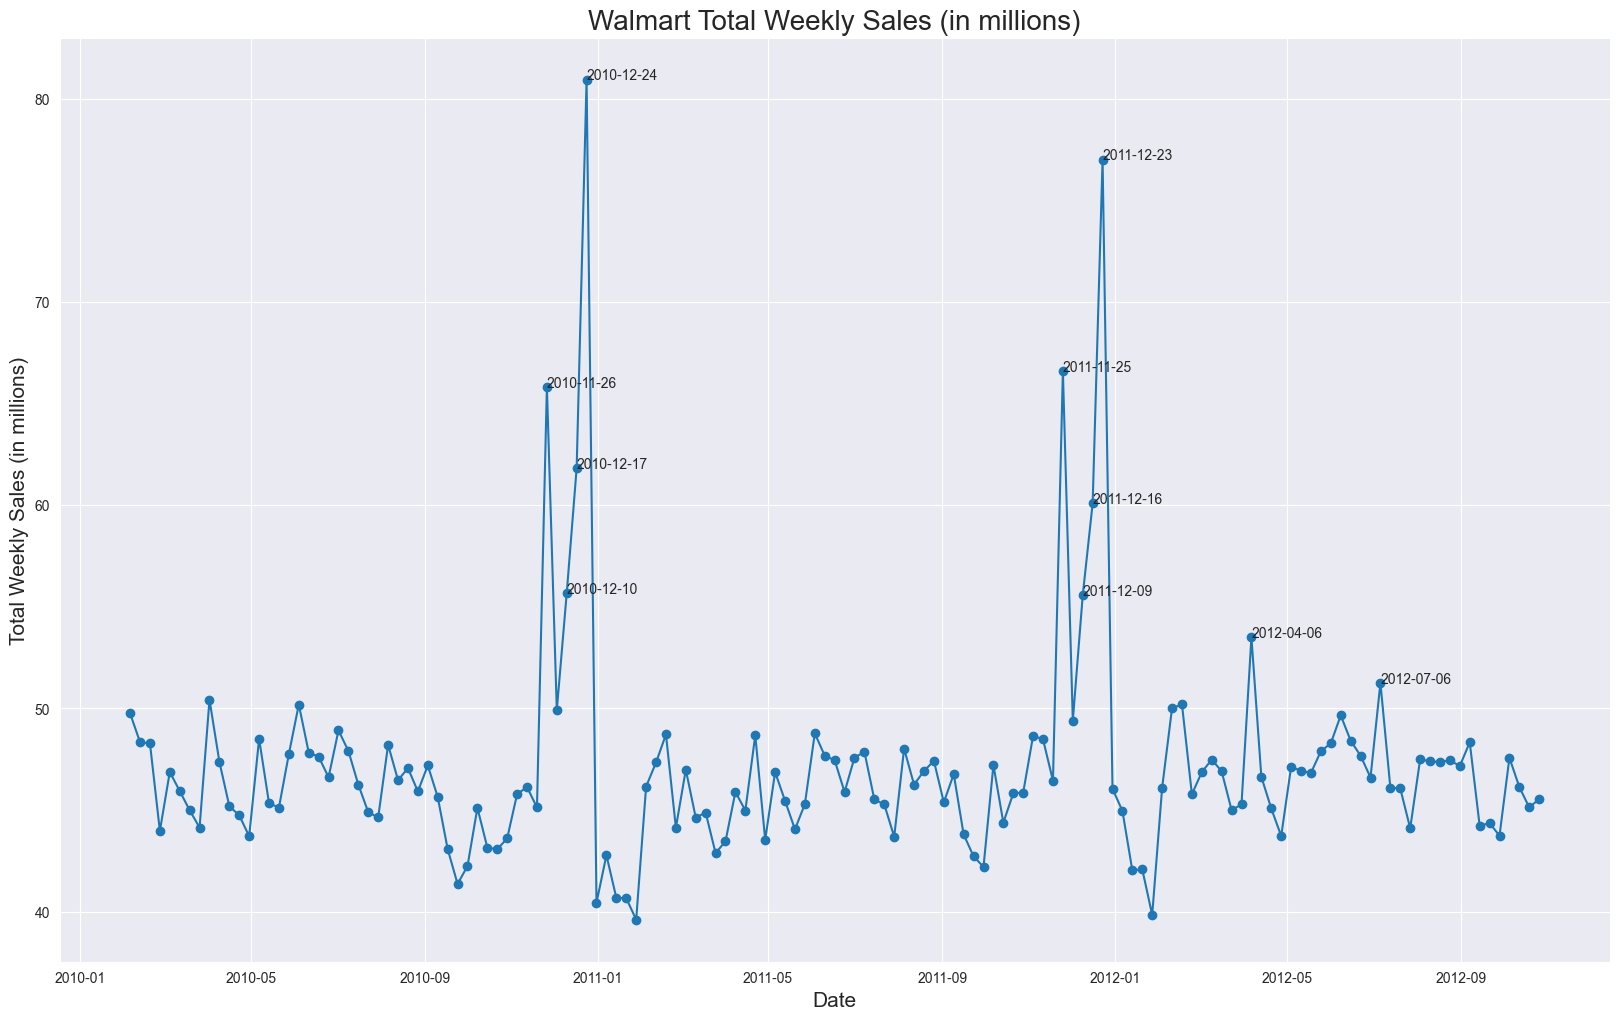

<Figure size 1000x600 with 0 Axes>

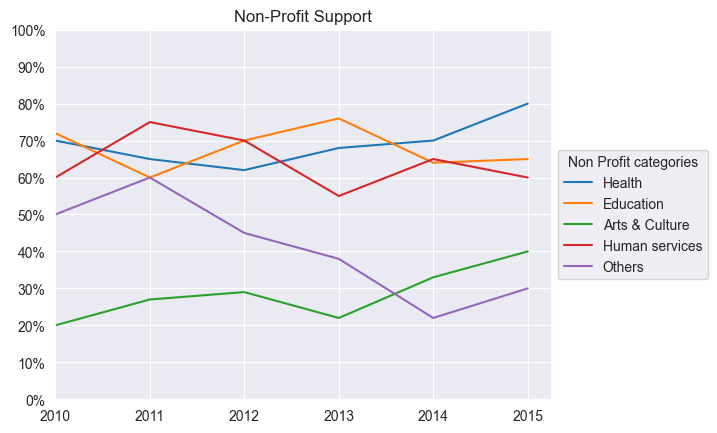

In [93]:
%run "OMDS-ModB2-Week2-Halder-Deb.ipynb"

### Below is the dataset that I had prepared as a part of week4 submission (available as I imported my previous notebook )

I will do the plotting using this data set

In [94]:
sales_with_markdown_df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Size,Store_Type_A,Store_Type_B,Store_Type_C,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
92,1,1,2011-11-11,18689.54,False,151315,True,False,False,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
93,1,1,2011-11-18,19050.66,False,151315,True,False,False,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,1,1,2011-11-25,20911.25,True,151315,True,False,False,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
95,1,1,2011-12-02,25293.49,False,151315,True,False,False,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,1,2011-12-09,33305.92,False,151315,True,False,False,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421561,45,98,2012-08-31,346.04,False,118221,False,True,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,225.229000,8.684,False
421562,45,98,2012-09-07,352.44,True,118221,False,True,False,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,225.229000,8.684,True
421564,45,98,2012-09-21,467.30,False,118221,False,True,False,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,225.229000,8.684,False
421565,45,98,2012-09-28,508.37,False,118221,False,True,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,225.229000,8.684,False


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

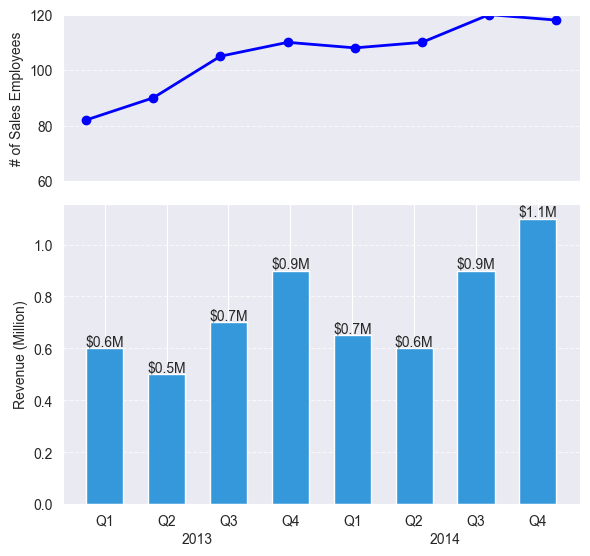

In [95]:
quarters_of_data_collected = pd.date_range(start='2013-01-01', end='2014-12-31', freq='QE')

quarterly_sales_data = {
    'Quarter': quarters_of_data_collected,
    'Sales_Employees': [82, 90, 105, 110, 108, 110, 120, 118],  
    'Revenue_Millions': [0.6, 0.5, 0.7, 0.9, 0.65, 0.6, 0.9, 1.1]   
}

df = pd.DataFrame(quarterly_sales_data)  # Uncommented this line as it's needed

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), height_ratios=[1, 1.8])

# Plot line graph on top subplot
ax1.plot(range(len(df)), df['Sales_Employees'], 'bo-', linewidth=2)
ax1.set_ylabel('# of Sales Employees')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_ylim(60, 120)
ax1.set_xticks([])

# plot bar graph on the bottom subplot
bars = ax2.bar(range(len(df)), df['Revenue_Millions'], color='#3498db', width=0.6)
ax2.set_ylabel('Revenue (Million)')
ax2.grid(True, linestyle='--', alpha=0.7, axis='y')

# customizing the x-axis labels
ax2.set_xticks(range(len(df)))
ax2.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'] * 2)  # Just quarters

# adding year labels centered under each group of quarters dynamically base don the amount of data collecteed in quarters_of_data_collected
years = df['Quarter'].dt.year.unique()
quarters_per_year = len(df) // len(years)
for i, year in enumerate(years):
    center_pos = (i * quarters_per_year) + (quarters_per_year / 2) - 0.5
    ax2.text(center_pos, -0.15, str(year), ha='center', transform=ax2.transData)

# adding the value on the bar  gives clarity though its not there in original graph in the book
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.1f}M',
             ha='center', va='bottom')

# adjust layout
plt.tight_layout()
plt.subplots_adjust(hspace=0.1, bottom=0.15)  # Added bottom space for year labels

plt.show()